# Preprocessing..... 

In [47]:
import pandas as pd
import numpy as np
import datetime

In [48]:
def classify_city(s_lat, s_lon):
    if abs(s_lat - 13) <= 1:
        if abs(s_lon - 80.5) <= 1:
            return 0  # delhi
        elif abs(s_lon - 77.5) <= 1:
            return 1  # banglore
    elif abs(s_lon - 72.5) <= 1:
        return 2  # chennai
    elif abs(s_lat - 25.5) <= 1:
        return 3  # lucknow
    elif abs(s_lon - 88.5) <= 1:
        return 4  # bombay
    elif abs(s_lat - 28.5) <= 1:
        return 5  # kolkata
    else:
        return None

In [49]:
def vehicle_chk(fd):
        #spl vehicles
    arr=[]
    for i in range(0,fd.index.size):
        if fd['VEHICLE_TYPE'][i] in ('AUTO RICKSHAW','TAXI AC','TAXI NON AC'):
            arr.append(1)
        else:
            arr.append(0)
    
    fd['SPL']=arr
    
    
    arr=[]
    for i in range(0,fd.index.size):
        if fd['VEHICLE_TYPE'][i] in ('AC BUS','TAXI AC','METRO'):
            arr.append(1)
        else:
            arr.append(0)
    
    fd['AC']=arr
   
    return fd 

In [50]:
def set_time_date(fd):
    
    def fun_hr(row):
        str=row['TIMESTAMP']
        hr=int(str[11:13])   
        return hr

    def fun_mi(row):
        str=row['TIMESTAMP']
        mi=int(str[14:16])
        return mi

    def fun_yr(row):
        str=row['TIMESTAMP']
        yr=int(str[0:4])
        return yr

    def fun_mo(row):
        str=row['TIMESTAMP']
        mo=int(str[5:7])
        return mo

    def fun_dy(row):
        str=row['TIMESTAMP']
        dy=int(str[8:10])
        return dy
    

    def fun_day(row):
        str=row['TIMESTAMP']
        yr=int(str[:4])
        mn=int(str[5:7])
        dy=int(str[8:10])
          #week start from monday   monday=0
            #tues=1 wed =2.... sat=5 sun=6
        x=datetime.datetime(yr,mn,dy).weekday()
        return x
    
    fd['HOUR']=fd.apply(lambda row:fun_hr(row),axis=1)
    fd['MIN']=fd.apply(lambda row:fun_mi(row),axis=1)
    fd['MONTH']=fd.apply(lambda row:fun_mo(row),axis=1)
    fd['YEAR']=fd.apply(lambda row:fun_yr(row),axis=1)
    fd['DAY']=fd.apply(lambda row:fun_day(row),axis=1)
    fd['DATE']=fd.apply(lambda row:fun_dy(row),axis=1)
    
    return fd 

In [51]:
def findMean_lat(city):
    if city == 0 or city == 1:
        return 13
    elif city == 2:
        return 19.5
    elif city == 3:
        return 25.5
    elif city == 4:
        return 22.5
    elif city == 5:
        return 28.5


# Returns mean longitude of the city
def findMean_long(city):
    if city == 0:
        return 80.5
    elif city == 1:
        return 77.5
    elif city == 2:
        return 72.5
    elif city == 3:
        return 83
    elif city == 4:
        return 88.5
    elif city == 5:
        return 77

    
def create_mapping(train_col):
    keys = train_col.unique().tolist()
    return dict(zip(keys, range(len(keys))))


In [52]:
def clean_data(df):
    
    
    df['CITY']=df.apply(lambda x: classify_city(x['STARTING_LATITUDE'], x['STARTING_LONGITUDE']), axis=1)
    
    
    df['mean_lat']  = df['CITY'].apply(lambda x: findMean_lat(x))
    df['mean_long'] = df['CITY'].apply(lambda x: findMean_long(x))
    
    df.STARTING_LONGITUDE    = df.apply(lambda x: x['mean_long'] - x['STARTING_LONGITUDE'], axis=1)
    df.DESTINATION_LONGITUDE = df.apply(lambda x: x['mean_long'] - x['DESTINATION_LONGITUDE'], axis=1)
    df.STARTING_LATITUDE     = df.apply(lambda x: x['mean_lat'] - x['STARTING_LATITUDE'], axis=1)
    df.DESTINATION_LATITUDE  = df.apply(lambda x: x['mean_lat'] - x['DESTINATION_LATITUDE'], axis=1)
    
    df.fillna(-100, inplace=True)

    
   
    
    df['VEHICLE_TYPE']=df['VEHICLE_TYPE'].str.upper()
    df['VEHICLE_TYPE'].fillna('NOT_GIVEN')
    
    
       
    
    df=set_time_date(df)
    
    df=vehicle_chk(df)
    


    mapping= create_mapping(df.VEHICLE_TYPE)

   
    print(mapping)
    df = df.replace({"VEHICLE_TYPE": mapping})
    

    
    
    df.reset_index(drop=True)
    
    return df

In [53]:
train = pd.read_csv('data/intracity_fare_train.csv')
test = pd.read_csv('data/intracity_fare_test.csv')
id_vec = np.array(test.loc[:,test.columns == 'ID'])

In [54]:
train=clean_data(train)

{'BUS': 0, 'TAXI AC': 1, 'TAXI NON AC': 2, 'METRO': 3, 'AC BUS': 4, 'MINI BUS': 5, 'AUTO RICKSHAW': 6}


In [55]:
test=clean_data(test)

{'METRO': 0, 'AC BUS': 1, 'MINI BUS': 2, 'AUTO RICKSHAW': 3, 'TAXI NON AC': 4, 'TAXI AC': 5, 'BUS': 6}


In [56]:
test.head()

,ID,TIMESTAMP,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,...,mean_lat,mean_long,HOUR,MIN,MONTH,YEAR,DAY,DATE,SPL,AC
0,1,2016-07-19 06:56:22,-0.166631,-0.092389,-0.142983,-0.048942,0,-100.0,-100.0,10,...,28.5,77.0,6,56,7,2016,1,19,0,1
1,2,2016-01-10 16:56:22,0.136876,0.034802,0.016798,0.004536,0,-100.0,-100.0,28,...,13.0,77.5,16,56,1,2016,6,10,0,1
2,3,2015-07-14 09:49:33,0.296356,-0.361170,0.338444,-0.339699,1,-100.0,-100.0,34,...,19.5,72.5,9,49,7,2015,1,14,0,1
3,4,2015-03-24 10:06:18,-0.168365,-0.030327,-0.205053,-0.080778,0,-100.0,-100.0,17,...,28.5,77.0,10,6,3,2015,1,24,0,1
4,5,2016-04-05 23:03:14,-0.050678,0.287346,-0.118577,0.265298,2,-100.0,-100.0,9,...,13.0,80.5,23,3,4,2016,1,5,0,0


In [57]:

train.to_csv("data/train.csv", index=False)
test.to_csv("data/test.csv", index=False)

# Driver function

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import neural_network
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [59]:
scaler = StandardScaler()
nn = neural_network.MLPRegressor(shuffle=True,
                                  alpha=0.5,
                                  hidden_layer_sizes=(100, 100),
                                  max_iter=10000,
                                  random_state=100,
                                  verbose=False)

from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(min_samples_leaf=9,n_estimators = 10,random_state=0,n_jobs=-1)

In [60]:
def crossValidate(X, y, clf):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    
    #print(clf.coefs_)
    print("CV performance")
    print(200 * metrics.r2_score(y_test, prediction))
   
    print("Train performance")
    print(200 * metrics.r2_score(y_train, clf.predict(X_train)))

In [61]:

def testRUN_crCsv(X, y, clf):
    
    scaler.fit(X)
    X = scaler.transform(X)
    
    clf.fit(X, y)
    
    predict = clf.predict(scaler.transform(test))
    
    arr=np.arange(1,len(test)+1)
    fd_res=pd.DataFrame(columns=['ID','FARE'] )
    
    fd_res['ID']=arr
    fd_res['FARE']=predict
    fd_res.to_csv("result/sol.csv", index=False, header=True, sep=',')


In [62]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')


In [63]:
x=train.corr()

In [64]:
x

,ID,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,...,mean_lat,mean_long,HOUR,MIN,MONTH,YEAR,DAY,DATE,SPL,AC
ID,1.000000,0.010920,0.011032,0.008077,0.008126,0.003877,0.011845,0.011818,0.000992,-0.001623,...,0.012209,0.011919,-0.010378,-0.012802,0.007964,-0.002964,-0.000190,0.014706,0.013745,0.006549
STARTING_LATITUDE,0.010920,1.000000,0.999811,0.814600,0.814462,-0.004797,0.005351,0.005946,-0.022490,-0.025822,...,0.965906,0.987621,0.012958,0.004562,0.009375,0.015312,0.000822,-0.001516,0.002370,0.001316
STARTING_LONGITUDE,0.011032,0.999811,1.000000,0.814551,0.814702,-0.004640,0.005185,0.005767,-0.021762,-0.024735,...,0.965405,0.989471,0.013074,0.004686,0.009428,0.015099,0.000842,-0.001441,0.002386,0.001276
DESTINATION_LATITUDE,0.008077,0.814600,0.814551,1.000000,0.999872,-0.001343,0.004964,0.006071,-0.009214,-0.014735,...,0.787896,0.805438,0.013610,0.007721,0.005594,0.013815,0.008097,0.002442,0.001593,0.001056
DESTINATION_LONGITUDE,0.008126,0.814462,0.814702,0.999872,1.000000,-0.001283,0.004865,0.005966,-0.008587,-0.013839,...,0.787491,0.806937,0.013744,0.007746,0.005639,0.013644,0.008128,0.002401,0.001597,0.001057
VEHICLE_TYPE,0.003877,-0.004797,-0.004640,-0.001343,-0.001283,1.000000,-0.469363,-0.470054,0.000335,0.003887,...,-0.002049,-0.004945,-0.005586,-0.007669,0.003482,-0.001637,0.011199,-0.001393,-0.004537,-0.135224
TOTAL_LUGGAGE_WEIGHT,0.011845,0.005351,0.005185,0.004964,0.004865,-0.469363,1.000000,0.994222,0.012760,0.000031,...,0.006378,0.005802,-0.000776,0.009141,-0.008559,-0.011185,-0.003629,-0.005020,0.730855,0.086348
WAIT_TIME,0.011818,0.005946,0.005767,0.006071,0.005966,-0.470054,0.994222,1.000000,0.012541,-0.000765,...,0.007631,0.006608,-0.000130,0.008498,-0.006985,-0.011808,-0.003247,-0.005695,0.732226,0.085747
TRAFFIC_STUCK_TIME,0.000992,-0.022490,-0.021762,-0.009214,-0.008587,0.000335,0.012760,0.012541,1.000000,0.465585,...,-0.030269,-0.023035,0.010651,-0.004853,-0.012766,0.005857,-0.001646,0.002970,0.008583,0.007912
DISTANCE,-0.001623,-0.025822,-0.024735,-0.014735,-0.013839,0.003887,0.000031,-0.000765,0.465585,1.000000,...,-0.042142,-0.027900,0.000936,-0.007544,-0.013582,-0.001348,-0.001635,0.000545,-0.000961,0.006586


In [65]:
train.head()

,ID,TIMESTAMP,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,...,mean_lat,mean_long,HOUR,MIN,MONTH,YEAR,DAY,DATE,SPL,AC
0,1,2016-01-21 06:59:49,-0.044677,0.264277,-0.178228,0.336723,0,-100.0,-100.0,8,...,13.0,80.5,6,59,1,2016,3,21,0,0
1,2,2016-06-17 22:23:30,-0.139580,-0.074113,-0.087288,0.028694,1,7.0,9.0,66,...,28.5,77.0,22,23,6,2016,4,17,1,1
2,3,2016-03-16 04:55:18,0.126119,0.030430,0.150344,0.007413,2,18.0,6.0,53,...,25.5,83.0,4,55,3,2016,2,16,1,0
3,4,2016-04-26 18:10:09,-100.000000,-100.000000,-100.000000,-100.000000,3,-100.0,-100.0,54,...,-100.0,-100.0,18,10,4,2016,1,26,0,1
4,5,2016-06-22 01:51:35,-0.043506,0.053727,-0.206696,0.070478,0,-100.0,-100.0,33,...,22.5,88.5,1,51,6,2016,2,22,0,0


In [66]:
train.describe()

,ID,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,...,mean_lat,mean_long,HOUR,MIN,MONTH,YEAR,DAY,DATE,SPL,AC
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,-3.338958,-3.397958,-4.964634,-5.021631,3.004800,-67.397700,-69.095950,30.066750,30.543050,...,16.093725,73.703125,11.465350,29.555450,6.499650,2015.496950,3.027000,14.515300,0.422350,0.427400
std,5773.647028,18.066705,18.055847,21.803977,21.791045,1.997968,52.170411,49.360255,21.951902,12.123407,...,22.455224,32.845592,6.893415,17.296846,3.450028,0.500003,1.998817,8.037773,0.493946,0.494714
min,1.000000,-100.000000,-100.000000,-100.000000,-100.000000,0.000000,-100.000000,-100.000000,0.000000,0.000000,...,-100.000000,-100.000000,0.000000,0.000000,1.000000,2015.000000,0.000000,1.000000,0.000000,0.000000
25%,5000.750000,-0.129398,-0.184546,-0.133775,-0.195211,1.000000,-100.000000,-100.000000,12.000000,22.000000,...,13.000000,77.000000,5.000000,15.000000,3.000000,2015.000000,1.000000,8.000000,0.000000,0.000000
50%,10000.500000,-0.013719,-0.008938,-0.018890,-0.010901,3.000000,-100.000000,-100.000000,26.000000,31.000000,...,19.500000,77.500000,11.000000,30.000000,7.000000,2015.000000,3.000000,15.000000,0.000000,0.000000
75%,15000.250000,0.160562,0.088197,0.156491,0.086486,5.000000,4.000000,2.000000,45.000000,40.000000,...,25.500000,83.000000,17.000000,45.000000,10.000000,2016.000000,5.000000,21.000000,1.000000,1.000000
max,20000.000000,0.489475,0.367170,0.489206,0.367120,6.000000,30.000000,19.000000,95.000000,99.000000,...,28.500000,88.500000,23.000000,59.000000,12.000000,2016.000000,6.000000,28.000000,1.000000,1.000000


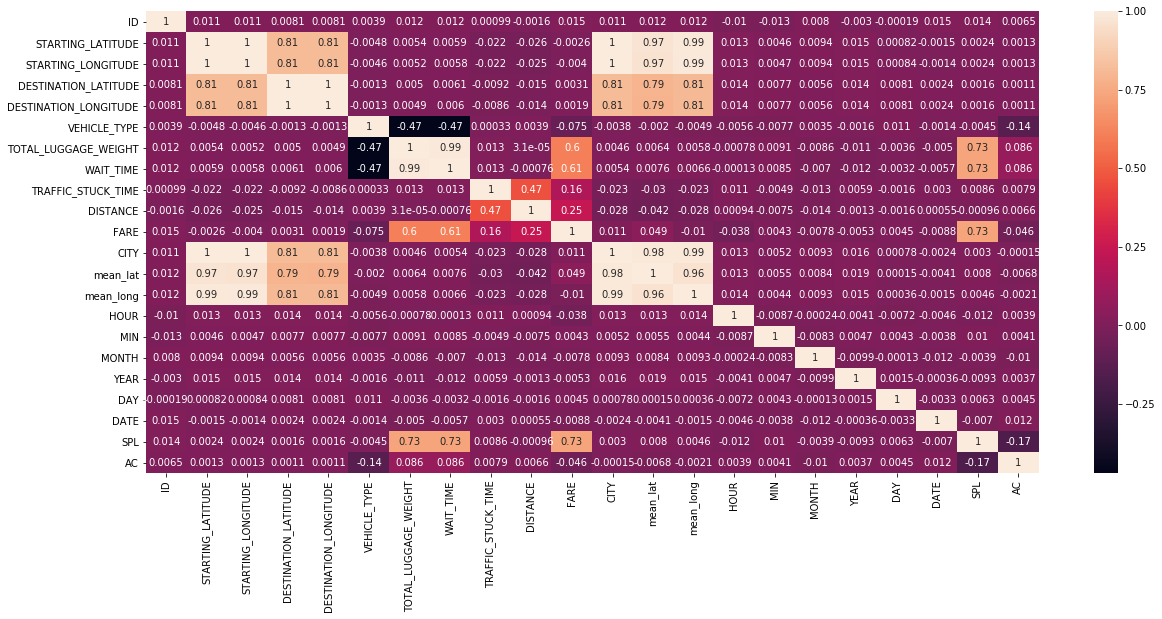

In [67]:
plt.subplots(figsize=(20,8.5))
sns.heatmap(x,annot=True)

In [68]:
arr=['ID','TIMESTAMP','DATE','DAY','YEAR','MONTH','MIN']

In [69]:
def fun_drop(fd,arr):
    fd=fd.drop(arr,axis=1)
    return fd

In [70]:
train=fun_drop(train,arr)

In [71]:
test=fun_drop(test,arr)

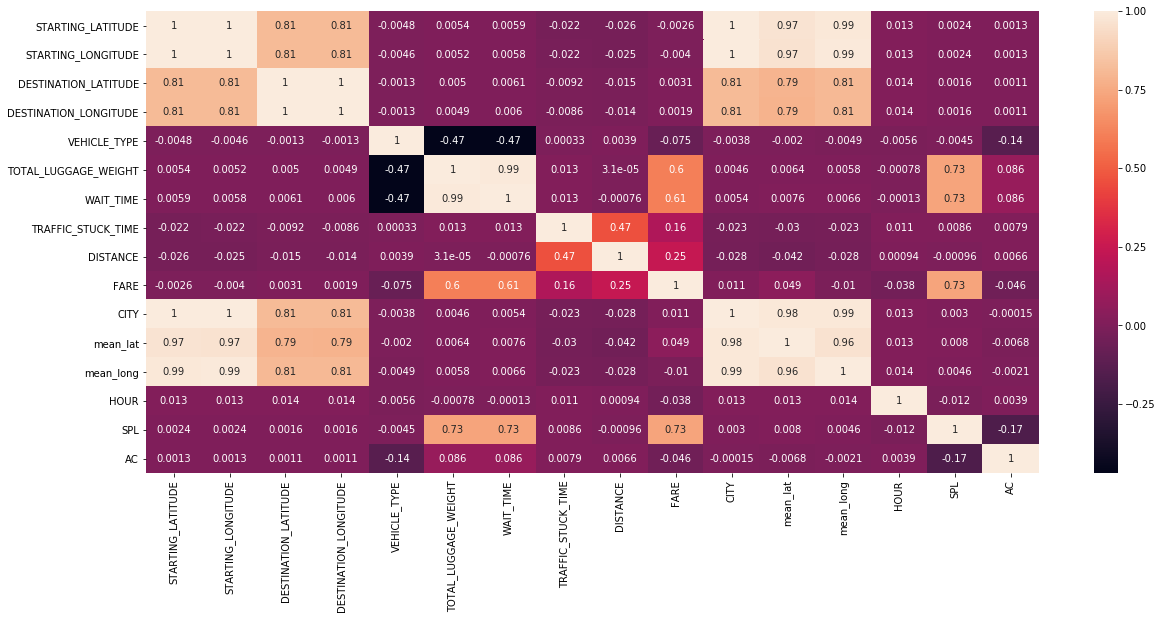

In [72]:
x=train.corr()
plt.subplots(figsize=(20,8.5))
sns.heatmap(x,annot=True)

In [73]:
train.head()

,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,FARE,CITY,mean_lat,mean_long,HOUR,SPL,AC
0,-0.044677,0.264277,-0.178228,0.336723,0,-100.0,-100.0,8,34,32.09,0.0,13.0,80.5,6,0,0
1,-0.139580,-0.074113,-0.087288,0.028694,1,7.0,9.0,66,34,985.99,5.0,28.5,77.0,22,1,1
2,0.126119,0.030430,0.150344,0.007413,2,18.0,6.0,53,1,1085.33,3.0,25.5,83.0,4,1,0
3,-100.000000,-100.000000,-100.000000,-100.000000,3,-100.0,-100.0,54,31,56.21,-100.0,-100.0,-100.0,18,0,1
4,-0.043506,0.053727,-0.206696,0.070478,0,-100.0,-100.0,33,44,30.62,4.0,22.5,88.5,1,0,0


In [74]:
X=train.drop('FARE',axis=1)
y=train['FARE']

In [75]:
crossValidate(X,y,reg)

CV performance
168.037989093
Train performance
174.586730771


In [77]:
testRUN_crCsv(X,y,reg)

In [78]:
 test.head(n=20)

,STARTING_LATITUDE,STARTING_LONGITUDE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,VEHICLE_TYPE,TOTAL_LUGGAGE_WEIGHT,WAIT_TIME,TRAFFIC_STUCK_TIME,DISTANCE,CITY,mean_lat,mean_long,HOUR,SPL,AC
0,-0.166631,-0.092389,-0.142983,-0.048942,0,-100.0,-100.0,10,17,5,28.5,77.0,6,0,1
1,0.136876,0.034802,0.016798,0.004536,0,-100.0,-100.0,28,27,1,13.0,77.5,16,0,1
2,0.296356,-0.361170,0.338444,-0.339699,1,-100.0,-100.0,34,45,2,19.5,72.5,9,0,1
3,-0.168365,-0.030327,-0.205053,-0.080778,0,-100.0,-100.0,17,14,5,28.5,77.0,10,0,1
4,-0.050678,0.287346,-0.118577,0.265298,2,-100.0,-100.0,9,10,0,13.0,80.5,23,0,0
5,-0.176089,-0.073643,-0.233554,-0.059548,3,-100.0,-100.0,10,12,5,28.5,77.0,21,1,0
6,-0.006167,-0.095210,0.066038,-0.136775,4,7.0,4.0,12,38,1,13.0,77.5,10,1,0
7,-0.069117,0.350058,-0.099617,0.355642,2,-100.0,-100.0,10,47,0,13.0,80.5,6,0,0
8,-0.192150,0.356964,-0.093686,0.315131,5,15.0,16.0,5,14,0,13.0,80.5,17,1,1
9,-0.082606,-0.176166,0.096999,-0.060116,2,-100.0,-100.0,5,28,1,13.0,77.5,22,0,0
